# EDA Project -                     Exploring Solar Projects in New York 


## Group12 - B2: Apurv Singh, Pranava Kadiyala, Zeinab Soumahoro

### Additional dependencies - !pip install squarify

### Importing modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import geopandas as gpd
from matplotlib import cm
import squarify as sq
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap

## Dataset1 - Alternate Fuel Stations

In [ ]:
#reading fuel station data
fuelstation = pd.read_csv("Alternative_Fuel_Stations_in_New_York.csv")
fuelstation.head()

Fuel Type Code                           Station Name  \
0           ELEC                         ShopRite Plaza   
1           ELEC                    Turner Parking Ramp   
2           ELEC  Parkit 301 E 64th - Tesla Destination   
3           ELEC                SKIDMORE PALAMOUNTAIN 1   
4           ELEC                            Potter Park   

          Street Address Intersection Directions              City State  \
0         2333 Nott St E                     NaN         Niskayuna    NY   
1          1 Perkins Dr.                     NaN           Buffalo    NY   
2          301 E 64th St                     NaN          New York    NY   
3           Perimeter Rd                     NaN  Saratoga Springs    NY   
4  53 West Church Street                     NaN          Fairport    NY   

     ZIP  Plus4               Station Phone Status Code  ...  \
0  12309    NaN                518-243-4565           E  ...   
1  14202    NaN                866-816-7584           E  ...   
2  10065    NaN  212-929-9404  877-798-3752           E  ...   
3  12866    NaN                888-758-4389           E  ...   
4  14450    NaN                866-816-7584           E  ...   

   EV Pricing (French) LPG Nozzle Types Hydrogen Pressures Hydrogen Standards  \
0                  NaN              NaN                NaN                NaN   
1                  NaN              NaN                NaN                NaN   
2                  NaN              NaN                NaN                NaN   
3                  NaN              NaN                NaN                NaN   
4                  NaN              NaN                NaN                NaN   

  CNG Fill Type Code CNG PSI CNG Vehicle Class  LNG Vehicle Class  \
0                NaN     NaN               NaN                NaN   
1                NaN     NaN               NaN                NaN   
2                NaN     NaN               NaN                NaN   
3                NaN     NaN               NaN                NaN   
4                NaN     NaN               NaN                NaN   

   EV On-Site Renewable Source                  Georeference  
0                          NaN  POINT (-73.889657 42.816614)  
1                          NaN   POINT (-78.879561 42.88585)  
2                          NaN   POINT (-73.961892 40.76389)  
3                          NaN  POINT (-73.783743 43.098201)  
4                          NaN  POINT (-77.446537 43.098049)  

[5 rows x 65 columns]

#### We have decided to only consider electric fuel stations over other non-renewable sources. Also, the dataset predominantly has electric station info.

In [ ]:

print(fuelstation['Fuel Type Code'].value_counts())
fuelstation.drop(fuelstation[fuelstation['Fuel Type Code'] != 'ELEC'].index, inplace = True)


ELEC    3090
E85       71
LPG       38
CNG       25
BD         3
Name: Fuel Type Code, dtype: int64


## Data Description: fuelstation data frame gives us information about alternative fuel stations available in New York Sate.

#### After studying the dataset, given our objective and intention to concentrate on stations that only provide electricity charging services, we chose the following variables (we provide a brief description of some non obvious variables below)


- Station_Name

- City

- State

- ZIP

- Groups_With_Access_Code: Descrptive info about who and how residents can access the station.

- Access_Day_Time: Provides information about when the station is accessible for use by the residents and specifies the charge.

- EV_Network: Electric Vehical Charging Network - compitabile infrasture used for charging.

- Latitude

- Longitude

- ID

- EV_Connector_Types: The connector plug-ins used for charging.

- EV_Price

- Access_Code: Whether accessible by the general public or private.

- Georeference

In [ ]:
fuelstation = pd.DataFrame(fuelstation, columns=['Station Name','City','State','ZIP', 'Groups With Access Code', 'Access Days Time','EV Network', 'Latitude', 'Longitude', 'ID', 'EV Connector Types', 'Access Code','EV Pricing', 'Georeference'])
print('Columns after selecting relevant variables\n \n',(fuelstation.columns))

Columns after selecting relevant variables
 
 Index(['Station Name', 'City', 'State', 'ZIP', 'Groups With Access Code',
       'Access Days Time', 'EV Network', 'Latitude', 'Longitude', 'ID',
       'EV Connector Types', 'Access Code', 'EV Pricing', 'Georeference'],
      dtype='object')


In [ ]:
fuelstation.rename(columns={'Station Name':'Station_Name','Groups With Access Code': 'Groups_With_Access_Code', 'Access Days Time' : 'Access_Day_Time' ,'EV Network':'EV_Network', 'EV Connector Types':'EV_Connector_Types', 'EV Pricing':'EV_Pricing', 'Access Code':'Access_Code'}, inplace=True)
print('Columns after renaming variables\n \n',(fuelstation.columns))

Columns after renaming variables
 
 Index(['Station_Name', 'City', 'State', 'ZIP', 'Groups_With_Access_Code',
       'Access_Day_Time', 'EV_Network', 'Latitude', 'Longitude', 'ID',
       'EV_Connector_Types', 'Access_Code', 'EV_Pricing', 'Georeference'],
      dtype='object')


#### Changing data types of our relevant variables

In [ ]:
fuelstation.dtypes

Station_Name                object
City                        object
State                       object
ZIP                          int64
Groups_With_Access_Code     object
Access_Day_Time             object
EV_Network                  object
Latitude                   float64
Longitude                  float64
ID                           int64
EV_Connector_Types          object
Access_Code                 object
EV_Pricing                  object
Georeference                object
dtype: object

In [ ]:


#change ev network data types to categories
fuelstation['EV_Network'] = fuelstation['EV_Network'].astype('category')

#change city data types to categories
fuelstation['City'] = fuelstation['City'].astype('category')

#change State data types to categories 
fuelstation['State'] = fuelstation['State'].astype('category')

#change access code data types to categories
fuelstation['Access_Code'] = fuelstation['Access_Code'].astype('category')

#change EV princing data types to categories
fuelstation['EV_Pricing'] = fuelstation['EV_Pricing'].astype('category')

fuelstation['Groups_With_Access_Code'] = fuelstation['Groups_With_Access_Code'].astype('category')

#change EV_Connector_Types types to categories
fuelstation['EV_Connector_Types'] = fuelstation['EV_Connector_Types'].astype('category')


### Droping null values

- We are dropping EV_Pricing even though it may be beneficial for the purposes of our analysis as there is a high percentage of missing. Any sort of imputation will also be wrong because pricing could be determined by a lot of variables effecting business decisions that are not present in the data.

- Since the percentage of other missing variables is extremely low, we will drop them.

In [ ]:
#Dealing with missing
#missing values
percent_missing_values_fuel = fuelstation.isnull().sum() * 100 / fuelstation.shape[0] 
missing_data_fuel = pd.DataFrame({'percent_missing': percent_missing_values_fuel}) 
missing_data_fuel = missing_data_fuel.sort_values(by='percent_missing', ascending=False) 
missing_data_fuel

percent_missing
EV_Pricing                     75.016181
Access_Day_Time                 7.637540
Station_Name                    0.000000
City                            0.000000
State                           0.000000
ZIP                             0.000000
Groups_With_Access_Code         0.000000
EV_Network                      0.000000
Latitude                        0.000000
Longitude                       0.000000
ID                              0.000000
EV_Connector_Types              0.000000
Access_Code                     0.000000
Georeference                    0.000000

In [ ]:
fuelstation.drop(columns = "EV_Pricing", inplace=True)
fuelstation.columns

#droping na
fuelstation = fuelstation.dropna()


In [ ]:
#calculating Missing Values percentages
percent_missing_values_fuel = fuelstation.isnull().sum() * 100 / fuelstation.shape[0] 
missing_data_fuel = pd.DataFrame({'percent_missing': percent_missing_values_fuel}) 
missing_data_fuel = missing_data_fuel.sort_values(by='percent_missing', ascending=False) 
missing_data_fuel

percent_missing
Station_Name                         0.0
City                                 0.0
State                                0.0
ZIP                                  0.0
Groups_With_Access_Code              0.0
Access_Day_Time                      0.0
EV_Network                           0.0
Latitude                             0.0
Longitude                            0.0
ID                                   0.0
EV_Connector_Types                   0.0
Access_Code                          0.0
Georeference                         0.0

#### Making the Access_Day_Time variable binary by using substring

#### Checking if the values within each column look ok, or if there is any issues

In [ ]:
cols = [ 'City', 'State',
       'Groups_With_Access_Code', 'Access_Day_Time', 'EV_Network', 
        'EV_Connector_Types', 'Access_Code']
for i in cols:
  print(i)
  print(fuelstation[i].value_counts().to_string())
  print('\n\n')

City
New York                   336
Albany                     148
Buffalo                    117
Rochester                  111
Brooklyn                    91
Saratoga Springs            59
Schenectady                 54
Troy                        44
Syracuse                    40
Latham                      40
Clifton Park                37
Kingston                    33
Queensbury                  31
Ithaca                      31
Altamont                    24
Lake Placid                 23
Delmar                      23
New Paltz                   22
Watervliet                  22
Lake George                 21
Plattsburgh                 20
Riverhead                   19
Cohoes                      19
Glens Falls                 18
Ballston Spa                17
White Plains                17
Vestal                      17
Liverpool                   16
Staten Island               16
Amsterdam                   16
Middletown                  16
Hudson                      15
Man

In [ ]:
fuelstation.to_csv("fuelstation_cleaned.csv", index=False)

## Dataset2 - Solar Projects

In [ ]:
# Reading solar program Data
solar_pr = pd.read_csv("Solar_Electric_Programs_Reported_by_NYSERDA__Beginning_2000.csv")
solar_pr.head()


Reporting Period    Project Number Legacy Project Number Street Address  \
0       10/31/2022            521570                   NaN            NaN   
1       10/31/2022            461128                   NaN            NaN   
2       10/31/2022  2011-188607-SLPR                   NaN            NaN   
3       10/31/2022            513856                   NaN            NaN   
4       10/31/2022            450304                   NaN            NaN   

       City       County State  ZIP Code Incorporated Municipality  \
0  Flushing     New York    NY     11369                       NaN   
1  Brooklyn        Kings    NY     11207                  New York   
2   Syosset       Nassau    NY     11791                Oyster Bay   
3   Jamaica       Queens    NY     11420                       NaN   
4  Ossining  Westchester    NY     10562                  Ossining   

  Municipality Type  ...  $Incentive Total Nameplate kW DC  \
0               NaN  ...       309.0                  2.49   
1              City  ...       740.0                  3.70   
2              Town  ...       756.0                  0.22   
3               NaN  ...       800.0                  4.00   
4              Town  ...      1034.0                  9.57   

  Expected KWh Annual Production Remote Net Metering Affordable Solar  \
0                         2125.0                 NaN               No   
1                         4177.0                 NaN               No   
2                          258.0                 NaN               No   
3                         4051.0                 NaN               No   
4                         6736.0                 NaN               No   

  Community Distributed Generation Green Jobs Green New York Participant  \
0                               No                                    No   
1                               No                                    No   
2                               No                                    No   
3                               No                                    No   
4                               No                                    No   

    Latitude  Longitude                    Georeference  
0        NaN        NaN                             NaN  
1  40.666004 -73.887154  POINT (-73.8871536 40.6660037)  
2  40.829398 -73.506017  POINT (-73.5060166 40.8293977)  
3        NaN        NaN                             NaN  
4  41.172183 -73.843707  POINT (-73.8437066 41.1721834)  

[5 rows x 38 columns]

## Brief Data description:
### Each row gives information of a solar project installed either at the residential or commercial level. These projects are installed with the support of the New York State Energy Research and Development Authority (NYSERDA) 

### After studying the dataset, given our objective of identifying efficient solar project installations, we chose the following variables as we believe they make most sense for our analysis:

- Project Number: Unique ID

- City

- County

- State

- Incorporated_Municipality

- Municipality_Type: City/Town

- Sector: Residential/Commercial

- Electric_Utility: 

- Date_Application_Received: The date of application submission by residents or businesses with the NYSERDA for a solar project installation.

- Date_Completed: Date of project completion

- Project_Status: Completed or Pipeline (underway)

- Contractor: The company or organisation contacted to install project.

- Minority_or_Women_Owned_Business_Enterprise: Binary variable to indicate the project was minority owned.

- Project_Cost: Cost of installing the solar project.

- $Incentive: Incentive amount associated with each solar project installation.

- Expected_KWh_Annual_Production

- Community_Distributed_Generation: Binary variable - Whether the project can be used for community distribution or is for private consumption.

- Longitude

- Latitude

- Georeference



In [ ]:
solar_pr.columns
solar_pr = pd.DataFrame(solar_pr, columns = ['Project Number', 'City', 'County', 'State', 'Incorporated Municipality', 'Municipality Type', 'Sector', 'Electric Utility', 
                                             'Purchase Type', 'Date Application Received','Date Completed', 'Project Status', 'Contractor', 
                                             'Minority or Women Owned Business Enterprise (MWBE)', 'Project Cost', '$Incentive', 'Expected KWh Annual Production',
                                             'Community Distributed Generation', 'Longitude', 'Latitude',
                                             'Georeference'])

In [ ]:
solar_pr.rename(columns = {'Project Number':'Project_Number', 'Incorporated Municipality':'Incorporated_Municipality', 'Municipality Type':'Municipality_Type', 'Electric Utility':'Electric_Utility',
                           'Purchase Type':'Purchase_Type', 'Date Application Received':'Date_Application_Received', 'Date Completed':'Date_Completed', 'Project Status':'Project_Status',
                           'Minority or Women Owned Business Enterprise (MWBE)':'Minority_or_Women_Owned_Business_Enterprise', 'Project Cost':'Project_Cost',
                           'Expected KWh Annual Production': 'Expected_KWh_Annual_Production', 'Community Distributed Generation': 'Community_Distributed_Generation'},
                inplace=True)

#### Changing data types of our relevant variables

In [ ]:
solar_pr.dtypes

Project_Number                                  object
City                                            object
County                                          object
State                                           object
Incorporated_Municipality                       object
Municipality_Type                               object
Sector                                          object
Electric_Utility                                object
Purchase_Type                                   object
Date_Application_Received                       object
Date_Completed                                  object
Project_Status                                  object
Contractor                                      object
Minority_or_Women_Owned_Business_Enterprise     object
Project_Cost                                   float64
$Incentive                                     float64
Expected_KWh_Annual_Production                 float64
Community_Distributed_Generation                object
Longitude 

In [ ]:
#change city data types to categories
solar_pr['City'] = solar_pr['City'].astype('category')

#change county data types to categories
solar_pr['County'] = solar_pr['County'].astype('category')

#change state data types to categories
solar_pr['State'] = solar_pr['State'].astype('category')

#change Incorporated Municipality types to categories
solar_pr['Incorporated_Municipality'] = solar_pr['Incorporated_Municipality'].astype('category')

#change Municipality types data types to categories
solar_pr['Municipality_Type'] = solar_pr['Municipality_Type'].astype('category')

#change sector data types to categories
solar_pr['Sector'] = solar_pr['Sector'].astype('category')

#change electric utility data types to categories
solar_pr['Electric_Utility'] = solar_pr['Electric_Utility'].astype('category')

#change project status data types to categories
solar_pr['Project_Status'] = solar_pr['Project_Status'].astype('category')

#change contractor data types to categories
solar_pr['Contractor'] = solar_pr['Contractor'].astype('category')

#change MWOBE data types to categories
solar_pr['Minority_or_Women_Owned_Business_Enterprise'] = solar_pr['Minority_or_Women_Owned_Business_Enterprise'].astype('category')

#change Community Distributed data types to categories
solar_pr['Community_Distributed_Generation'] = solar_pr['Community_Distributed_Generation'].astype('category')

#change Date_Application_Received  data types to datetime
solar_pr['Date_Application_Received'] = pd.to_datetime(solar_pr['Date_Application_Received'])

#change Date_Completed  data types to datetime
solar_pr['Date_Completed'] = pd.to_datetime(solar_pr['Date_Completed'])

### Droping and filling NAs
- After looking at the mean and median of '$Incentives', we will replace the missing values with the median because the distribution is not symmetrical.

- We will be keeping the Null Values corresponding to the 'Date_Completed' variable as it's value is null for projects that are currently in pipeline 
- Since the percentage of other missing variables is extremely low, we will drop them.

In [ ]:
#Dealing with missing
#missing values
percent_missing_values_solar = solar_pr.isnull().sum() * 100 / solar_pr.shape[0] 
missing_data_solar = pd.DataFrame({'percent_missing': percent_missing_values_solar}) 
missing_data_solar = missing_data_solar.sort_values(by='percent_missing', ascending=False) 
missing_data_solar

percent_missing
Contractor                                          8.709579
Date_Completed                                      6.518660
Purchase_Type                                       3.907067
$Incentive                                          3.189574
Expected_KWh_Annual_Production                      0.046267
Electric_Utility                                    0.031319
Latitude                                            0.026337
Longitude                                           0.026337
Georeference                                        0.026337
Municipality_Type                                   0.022066
Incorporated_Municipality                           0.022066
County                                              0.002135
Date_Application_Received                           0.000000
City                                                0.000000
Project_Status                                      0.000000
Sector                                              0.000000
Minority_or_Women_Owned_Business_Enterprise         0.000000
Project_Cost                                        0.000000
Community_Distributed_Generation                    0.000000
State                                               0.000000
Project_Number                                      0.000000

In [ ]:
# Analyzing data 
print('Mean is',solar_pr['$Incentive'].mean(),'and Median is',solar_pr['$Incentive'].median())

# Code to impute missing values
solar_pr['$Incentive'] = solar_pr['$Incentive'].fillna(solar_pr['$Incentive'].median())

Mean is 17397.6310797159 and Median is 2890.0


#### We found that there a connection between Project_Status and Date_Completed. All the nulls in Date_Completed are a result of the pipeline projects being still in progress so we would be keeping that data


In [ ]:
print(solar_pr.groupby("Project_Status")[["Date_Completed"]].count())
print()
print(solar_pr[["Date_Completed"]].info())
print()
print(solar_pr.shape)
#As seen, all the Nulls in Date_Completed come from Pipeline Projects

                Date_Completed
Project_Status                
Complete                131331
Pipeline                     0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140489 entries, 0 to 140488
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date_Completed  131331 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB
None

(140489, 21)


In [ ]:
#Hence, we drop all rows which have missing in all other variables except for Date_Completed
solar_pr = solar_pr.dropna(subset = ['Project_Number', 'City', 'County', 'State',
       'Incorporated_Municipality', 'Municipality_Type', 'Sector',
       'Electric_Utility', 'Purchase_Type', 'Date_Application_Received', 
       'Project_Status', 'Contractor',
       'Minority_or_Women_Owned_Business_Enterprise', 'Project_Cost',
       'Expected_KWh_Annual_Production',
       'Community_Distributed_Generation', 'Longitude', 'Latitude',
       'Georeference'])
print(solar_pr.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 122950 entries, 25 to 140488
Data columns (total 21 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Project_Number                               122950 non-null  object        
 1   City                                         122950 non-null  category      
 2   County                                       122950 non-null  category      
 3   State                                        122950 non-null  category      
 4   Incorporated_Municipality                    122950 non-null  category      
 5   Municipality_Type                            122950 non-null  category      
 6   Sector                                       122950 non-null  category      
 7   Electric_Utility                             122950 non-null  category      
 8   Purchase_Type                                122950 non-null  o

### Checking if the values within each column make sense. <br>
Note - We don't check this for City, County, ZIP_code, Incorporated Municipality, Eelctric Utility, Contractor as these are all nouns. <br>
Note2 - We also don't check for date variables because they are already in the to_date format 


In [ ]:
#checking if the values within each column look ok, or if there is any issues
cols = [ 'State',
       'Incorporated_Municipality', 'Municipality_Type', 'Sector',
       'Electric_Utility', 'Purchase_Type',
       'Project_Status', 'Contractor',
       'Minority_or_Women_Owned_Business_Enterprise',
       'Community_Distributed_Generation']
for i in cols:
  print(i)
  print(solar_pr[i].value_counts().to_string())
  print('\n\n')

State
NY    122950



Incorporated_Municipality
New York            35674
Hempstead            6062
Brookhaven           4938
Islip                3445
Babylon              3121
Oyster Bay           2775
Huntington           1558
Clarkstown           1552
Yonkers              1526
Smithtown            1384
Greenburgh           1353
Colonie              1073
North Hempstead      1021
Ramapo                912
Cortlandt             911
Newburgh              904
Southampton           833
Warwick               786
Poughkeepsie          768
Wallkill              722
New Windsor           694
Haverstraw            633
East Fishkill         618
Orangetown            605
Blooming Grove        594
Mount Pleasant        558
Ossining              552
Monroe                550
Amherst               537
Albany                534
Middletown            486
New Rochelle          475
Rye                   474
Wappinger             460
White Plains          454
Rotterdam             453
Yorktown        

In [ ]:
solar_pr.to_csv("solar_cleaned.csv", index=False)

### Loading shape files of both datasets

In [ ]:
alt_fuel_data = gpd.read_file("Alternative Fuel Stations in New York/geo_export_79be1df3-4ad0-493d-af2d-cea3d362469e.shp")
solar_data = gpd.read_file("Solar Electric Programs Reported by NYSERDA_ Beginning 2000/geo_export_fa8f4384-4365-4e3f-a67c-7d40d75a7c1d.shp")



### Renaming Staten Island, Brooklyn and Bronx as New York City and filtering the rows with New York, Buffalo and Yonkers

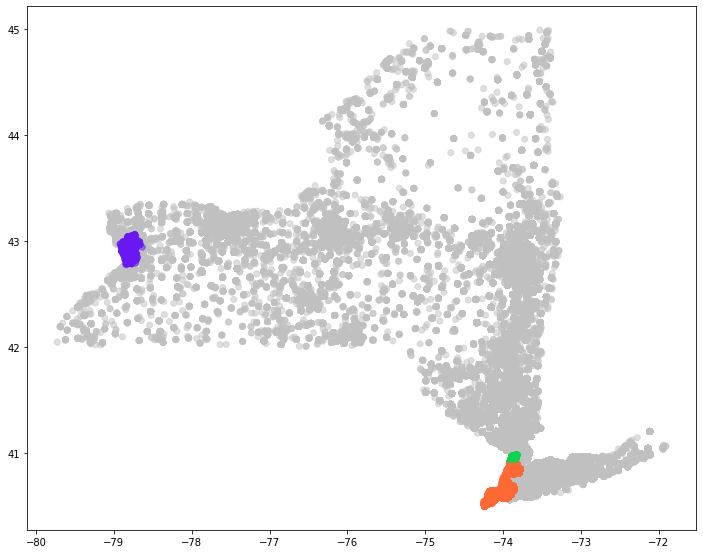

In [ ]:

solar_data['city'].replace(to_replace=['Staten Island', 'Brooklyn','Bronx'], value='New York',inplace = True)


cities = list(solar_data['city'].unique())
target_city = ['New York','Yonkers','Buffalo']
other_cities =  [x for x in cities if x not in target_city]


solar_data_target = solar_data[solar_data['city'].isin(target_city)]
solar_data_other = solar_data[solar_data['city'].isin(other_cities)]


solar_data_other = solar_data_other[solar_data_other['city'].notnull()].copy()
solar_data_other['city'] = 'Other City'



solar_data_combined = solar_data_other.append(solar_data_target, ignore_index=True)


cmp = ListedColormap(['#6918F3','#FF6933','#c0c0c0','#0DD352'])
fig, ax = plt.subplots(1,1, figsize=(12,12))

solar_data_combined.plot(column='city',cmap = cmp, ax=ax, alpha = 0.5)
plt.show()



### We will be merging our clean datasets with the shape files so that we will get the geographical points corresponding to our sanitized dataset

In [ ]:
# Renaming variables to a common one before merging

alt_fuel_data.rename(columns={'id':'ID'}, inplace=True)
alt_fuel_data['ID'] =  alt_fuel_data['ID'].astype('int64')

solar_data.rename(columns={'project_nu':'Project_Number'}, inplace=True)


### Merging the datasets with their geojson shape files

In [ ]:
alt_fuel_data_merged = pd.merge(alt_fuel_data, fuelstation, on='ID', how='inner')
solar_data_merged = pd.merge(solar_data, solar_pr, on='Project_Number', how='inner')

### Filtering dataframe with New York as Incorporated_Municipality

In [ ]:
solar_pr[solar_pr['Incorporated_Municipality']=='New York'].Contractor.value_counts().sort_values(ascending=False).head(20)

SunRun Inc.                                      9604
SunPower Capital LLC                             6844
Venture Home Solar LLC                           2755
IGS Solar, LLC                                   2215
Brooklyn SolarWorks, LLC                         1523
1st Light Energy                                 1114
Kamtech Restoration Corp                          965
Momentum Solar (dba for Pro Custom Solar LLC)     956
NRG Residential Solar Solutions                   914
Sunnova Energy Corp.                              758
EmPower Solar                                     535
Level Solar                                       509
SUNCO CAPITAL LLC                                 426
Amergy Solar Inc.                                 413
Best Energy Power                                 347
Green Street Power Partners, LLC                  333
Sea Bright Solar                                  266
You Save Green, Inc                               247
Accord Power, Inc.          

In [ ]:
solar_ny = solar_pr[solar_pr['Incorporated_Municipality']=='New York']
solar_ny['Incorporated_Municipality'].describe()


count        35674
unique           1
top       New York
freq         35674
Name: Incorporated_Municipality, dtype: object

### Renaming contractors for better vizualisation:

In [ ]:
solar_pr['Contractor']=solar_pr['Contractor'].replace({'Momentum Solar (dba for Pro Custom Solar LLC)':'Momentum Solar'})
solar_pr['Contractor']=solar_pr['Contractor'].replace({'Brooklyn SolarWorks, LLC':'Brooklyn Solar'})
solar_pr['Contractor']=solar_pr['Contractor'].replace({'NRG Residential Solar Solutions':'NRG Solar'})
solar_pr['Contractor']=solar_pr['Contractor'].replace({'Kamtech Restoration Corp':'Kamtech Rest. Corp'})
solar_pr['Contractor']=solar_pr['Contractor'].replace({'Venture Home Solar LLC':'Venture LLC'})
solar_pr['Contractor']=solar_pr['Contractor'].replace({'CIR Electrical Construction Corp.':'CIR Electrical Const. Corp.'})
solar_pr['Contractor']=solar_pr['Contractor'].replace({'Direct Energy Solar (formerly Astrum)':'Direct Energy Solar'})
solar_pr['Contractor']=solar_pr['Contractor'].replace({'Solar Liberty Energy Systems, Inc.': 'Solar Liberty Inc.'})
solar_pr['Contractor']=solar_pr['Contractor'].replace({'TM Montante Solar Developments LLC': 'TM Montante Solar'})

solar_pr['Contractor']=solar_pr['Contractor'].replace({'Trinity Solar (dba for Trinity Heating and Air)': 'Trinity Solar'})

In [ ]:
solar_buf = solar_pr[solar_pr['Incorporated_Municipality']=='Buffalo']
solar_yon = solar_pr[solar_pr['Incorporated_Municipality']=='Yonkers']
x = solar_ny.groupby('Contractor')['Contractor'].count().sort_values(ascending=False).head(10).index.to_list()

ny_top = pd.DataFrame(x)
ny_top = ny_top.rename(columns={0: 'Contractor'})

solar_ny_top = pd.merge(solar_ny, ny_top, on='Contractor')
solar_ny_top['Processing_Time'] = solar_ny_top['Date_Completed']-solar_ny_top['Date_Application_Received']

y = solar_buf.groupby('Contractor')['Contractor'].count().sort_values(ascending=False).head(10).index.to_list()

buf_top = pd.DataFrame(y)
buf_top = buf_top.rename(columns={0: 'Contractor'})

solar_buf_top = pd.merge(solar_buf, buf_top, on='Contractor')
solar_buf_top['Processing_Time'] = solar_buf_top['Date_Completed']-solar_buf_top['Date_Application_Received']

z = solar_yon.groupby('Contractor')['Contractor'].count().sort_values(ascending=False).head(10).index.to_list()

yon_top = pd.DataFrame(z)
yon_top = yon_top.rename(columns={0: 'Contractor'})

solar_yon_top = pd.merge(solar_yon, yon_top, on='Contractor')
solar_yon_top['Processing_Time'] = solar_yon_top['Date_Completed']-solar_yon_top['Date_Application_Received']

#### Processing Time dfs

In [ ]:
ny_processing_time_df = pd.DataFrame(solar_ny_top.groupby('Contractor')['Processing_Time'].mean())
ny_processing_time_df = ny_processing_time_df.reset_index()
ny_processing_time_df['Processing_Time'] = ny_processing_time_df['Processing_Time'].dt.days.astype('int32')

buf_processing_time_df = pd.DataFrame(solar_buf_top.groupby('Contractor')['Processing_Time'].mean())
buf_processing_time_df = buf_processing_time_df.reset_index()
buf_processing_time_df['Processing_Time'] = buf_processing_time_df['Processing_Time'].dt.days.astype('int32')

yon_processing_time_df = pd.DataFrame(solar_yon_top.groupby('Contractor')['Processing_Time'].mean())
yon_processing_time_df = yon_processing_time_df.reset_index()
yon_processing_time_df['Processing_Time'] = yon_processing_time_df['Processing_Time'].dt.days.astype('int32')

#### Per Unit Cost dfs

In [ ]:
ny_unit_project_cost_df = pd.DataFrame(solar_ny_top.groupby('Contractor')[['Project_Cost', 'Expected_KWh_Annual_Production']].mean())
ny_unit_project_cost_df = ny_unit_project_cost_df.reset_index()
ny_unit_project_cost_df['Per_Unit_Cost'] = ny_unit_project_cost_df['Project_Cost']/ny_unit_project_cost_df['Expected_KWh_Annual_Production']

buf_unit_project_cost_df = pd.DataFrame(solar_buf_top.groupby('Contractor')[['Project_Cost', 'Expected_KWh_Annual_Production']].mean().reset_index())
buf_unit_project_cost_df['Per_Unit_Cost'] = buf_unit_project_cost_df['Project_Cost']/buf_unit_project_cost_df['Expected_KWh_Annual_Production']

yon_unit_project_cost_df = pd.DataFrame(solar_yon_top.groupby('Contractor')[['Project_Cost', 'Expected_KWh_Annual_Production']].mean().reset_index())
yon_unit_project_cost_df['Per_Unit_Cost'] = yon_unit_project_cost_df['Project_Cost']/yon_unit_project_cost_df['Expected_KWh_Annual_Production']

ny_final = pd.merge(ny_unit_project_cost_df, ny_processing_time_df, on='Contractor')

buf_final = pd.merge(buf_unit_project_cost_df, buf_processing_time_df, on='Contractor')
yon_final = pd.merge(yon_unit_project_cost_df, yon_processing_time_df, on='Contractor')




## PLOTS

### Intro Visuals

In [ ]:
city = ['New York', 'Buffalo', 'Yonkers']
city = pd.DataFrame(city)
city = city.rename(columns={0:'Incorporated_Municipality'})

solar_city = pd.merge(solar_pr, city, on='Incorporated_Municipality')
solar_count = solar_city.groupby('Incorporated_Municipality')['Project_Number'].count().reset_index()
solar_city['Processing_Time'] = solar_city['Date_Completed'] - solar_city['Date_Application_Received']
solar_city['Per_Unit_Cost'] = solar_city['Project_Cost']/solar_city['Expected_KWh_Annual_Production']
solar_avg = solar_city.groupby('Incorporated_Municipality')[['Project_Cost', 'Expected_KWh_Annual_Production']].mean().reset_index()
solar_capacity = solar_city.groupby('Incorporated_Municipality')['Expected_KWh_Annual_Production'].sum().reset_index()


### New York

In [ ]:
cmap = matplotlib.cm.Oranges
norm = matplotlib.colors.Normalize(vmin=ny_unit_project_cost_df.Project_Cost.min(),
                                 vmax=ny_unit_project_cost_df.Project_Cost.max())
colors = [cmap(norm(i)) for i in ny_unit_project_cost_df.Project_Cost]
plt.figure(figsize=(12,8))
sizes = ny_unit_project_cost_df['Project_Cost']
sq.plot(sizes, value =ny_unit_project_cost_df.Contractor,color = colors,alpha = 0.7, pad = True)
plt.axis('off')

plt.show()

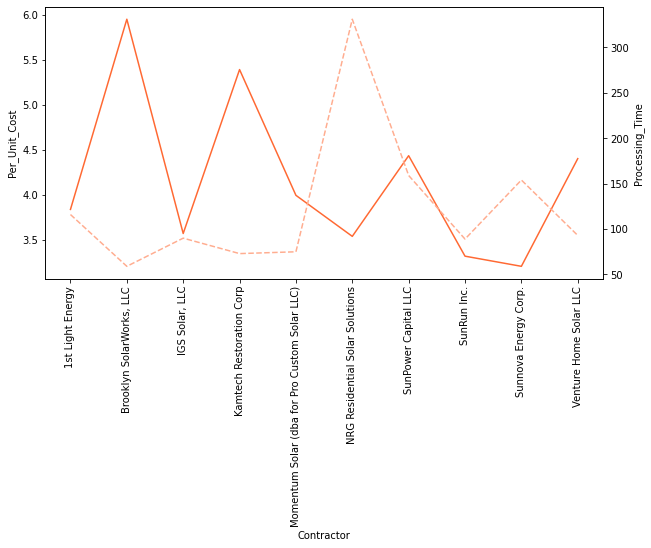

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=ny_final['Contractor'], y=ny_final['Per_Unit_Cost'], color='#FF6933', dashes=True)
ax2 = ax.twinx()
sns.lineplot(x=ny_final['Contractor'], y=ny_final['Processing_Time'], color='#ffad90', dashes=True, ax=ax2, linestyle="dashed")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [ ]:
solar_ny['Minority_or_Women_Owned_Business_Enterprise'].value_counts()[1]

279

In [ ]:
min_pct = solar_ny['Minority_or_Women_Owned_Business_Enterprise'].value_counts()[1]/solar_ny.shape[0]*100
min_pct

0.7820821887088636

### Buffalo

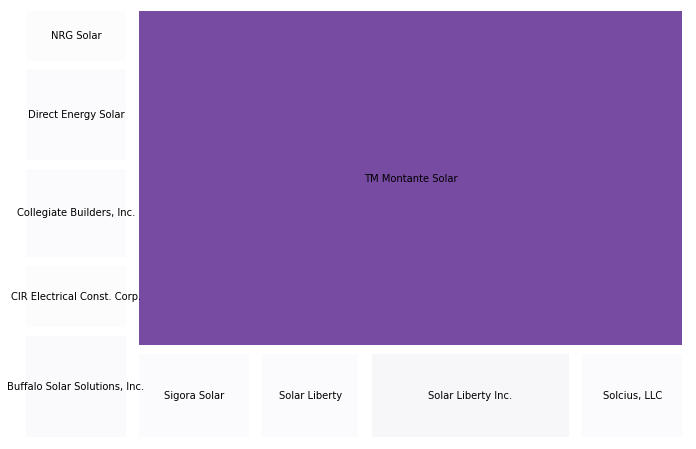

In [ ]:
cmap = matplotlib.cm.Purples
norm = matplotlib.colors.Normalize(vmin=buf_unit_project_cost_df.Project_Cost.min(),
                                 vmax=buf_unit_project_cost_df.Project_Cost.max())
colors = [cmap(norm(i)) for i in buf_unit_project_cost_df.Project_Cost]

plt.figure(figsize=(12,8))
sizes = buf_unit_project_cost_df['Project_Cost']
sq.plot(sizes, value =buf_unit_project_cost_df.Contractor,color = colors,alpha = 0.7, pad = True)
plt.axis('off')

plt.show()

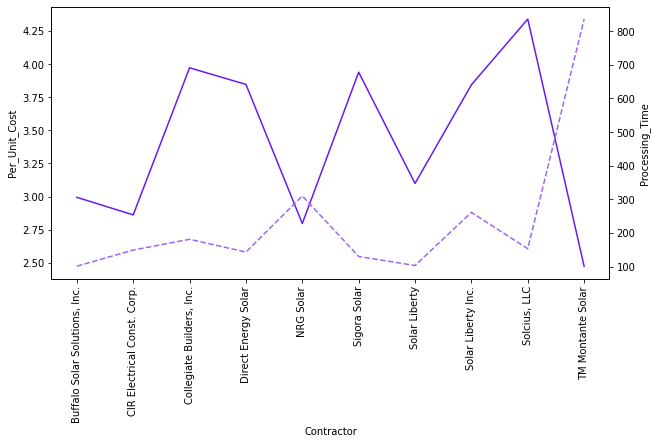

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=buf_final['Contractor'], y=buf_final['Per_Unit_Cost'], color='#6918F3', dashes=True)
ax2 = ax.twinx()
sns.lineplot(x=buf_final['Contractor'], y=buf_final['Processing_Time'], color='#9b66f7', dashes=True, ax=ax2, linestyle="dashed")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [ ]:
min_pct_buf = solar_buf['Minority_or_Women_Owned_Business_Enterprise'].value_counts()[1]/solar_buf.shape[0]*100
min_pct_buf

0.0

### Yonkers

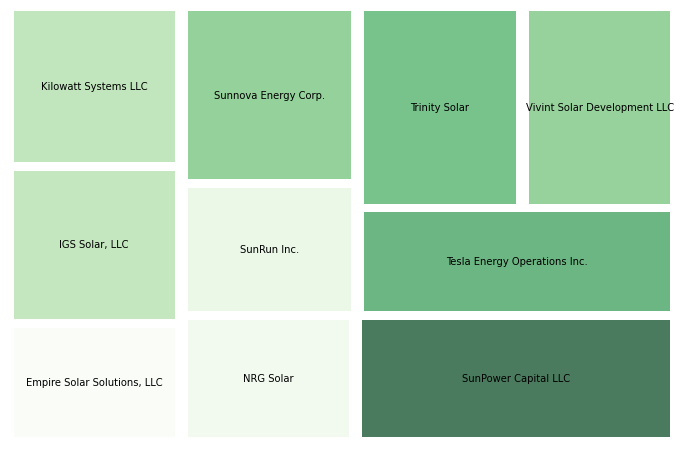

In [ ]:
cmap = matplotlib.cm.Greens
norm = matplotlib.colors.Normalize(vmin=yon_unit_project_cost_df.Project_Cost.min(),
                                 vmax=yon_unit_project_cost_df.Project_Cost.max())
colors = [cmap(norm(i)) for i in yon_unit_project_cost_df.Project_Cost]

plt.figure(figsize=(12,8))
sizes = yon_unit_project_cost_df['Project_Cost']
sq.plot(sizes, value =yon_unit_project_cost_df.Contractor,color = colors,alpha = 0.7, pad = True)
plt.axis('off')

plt.show()

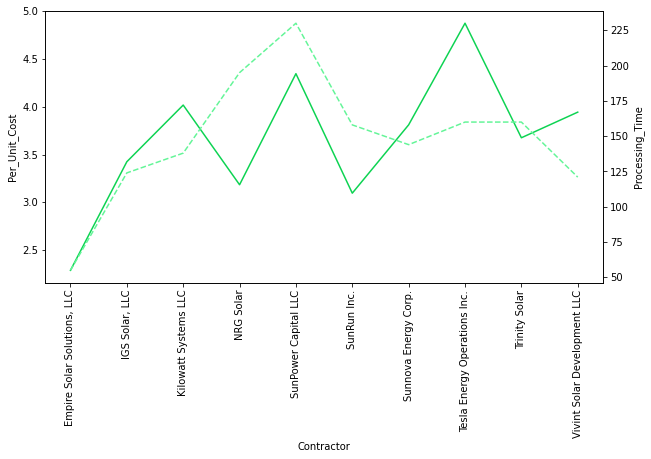

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=yon_final['Contractor'], y=yon_final['Per_Unit_Cost'], color='#0DD352', dashes=True)
ax2 = ax.twinx()
sns.lineplot(x=yon_final['Contractor'], y=yon_final['Processing_Time'], color='#64f598', dashes=True, ax=ax2, linestyle="dashed")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

### Calculating the minority owned business with solar project

In [ ]:
min_pct_yon = solar_yon['Minority_or_Women_Owned_Business_Enterprise'].value_counts()[1]
min_pct_yon

1

In [ ]:
min_pct_ny = solar_ny['Minority_or_Women_Owned_Business_Enterprise'].value_counts()[1]
min_pct_ny

279

In [ ]:
min_pct_buf = solar_buf['Minority_or_Women_Owned_Business_Enterprise'].value_counts()[1]
min_pct_buf

0

### NYC has the highest number of minority/women owned business solar projects

***************************************************************

## References:
* https://stackoverflow.com/questions/22137723/convert-number-strings-with-commas-in-pandas-dataframe-to-float
* https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
* https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html
* https://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot
* Lecture notes 3,4,5,6 and 7

